# Simple Linear Regression .Minimal example

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# 3D graphs 
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on 

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
inputs.shape

(1000, 2)

## Create the targets we will aim at 

targets = f(x,z) = 2*x - 3*z +5 + noise

In [6]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

## Ploting the data
#### The point to see that there is a strong trend that our model should learn to reproduce

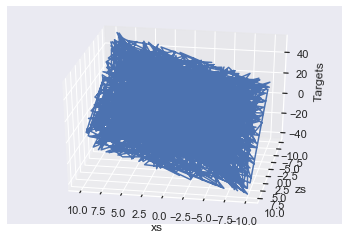

In [11]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

Our initial weights and bias will be pickedd from the interval[-0.1,0.1]

In [13]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

bias = np.random.uniform(-init_range,init_range,size=1)

print(weights,bias)

[[-0.0853396 ]
 [ 0.01759178]] [0.04365808]


### Set learning rate 

In [26]:
learning_rate = 0.001

## Train the model

In [29]:
for i in range(100):
    outputs = np.dot(inputs,weights) + bias 
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/ 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    bias = bias - learning_rate * np.sum(deltas_scaled)

0.16657174370398573
0.16657174176452924
0.16657173982894774
0.16657173789723345
0.16657173596937877
0.16657173404537592
0.16657173212521714
0.16657173020889485
0.16657172829640138
0.16657172638772896
0.16657172448287016
0.16657172258181718
0.16657172068456244
0.16657171879109844
0.16657171690141753
0.16657171501551216
0.16657171313337477
0.166571711254998
0.16657170938037413
0.1665717075094957
0.16657170564235532
0.1665717037789453
0.1665717019192586
0.16657170006328736
0.16657169821102438
0.16657169636246222
0.16657169451759332
0.16657169267641064
0.16657169083890647
0.16657168900507371
0.16657168717490486
0.16657168534839265
0.1665716835255299
0.16657168170630904
0.1665716798907231
0.16657167807876452
0.1665716762704264
0.16657167446570115
0.1665716726645818
0.166571670867061
0.16657166907313178
0.16657166728278663
0.16657166549601862
0.16657166371282056
0.16657166193318537
0.16657166015710578
0.16657165838457483
0.16657165661558532
0.16657165485013017
0.16657165308820246
0.166571651

#### Print weights and biases and see if we have worked correctly 

weights should be 2 and -3 and bias 5

In [30]:
print(weights,bias)

[[ 1.9936342 ]
 [-3.00143719]] [5.01530765]


### Plot the outputs vs targets 
Since they are the last ones at the end of the training , they represent the final model accuracy
The closer this plot is to a 45 degree line the closer taraget and output values are

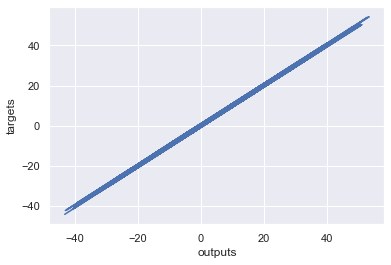

In [25]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()